# Inferential Statistics

Gender AgeGroup weight height
M      Elder     70      1.4
F      Adult     65      1.2
M      Adult     65      1.4
F      Child     20       1
F      Adult     75      1.3
M      Elde      80      1.3



In [4]:
#generating random sample 

In [5]:
import random
import numpy as np
# testing module
from scipy import stats


###  T Test

In [7]:
age=[random.randint(1,100) for i in range(100)]
weights=[random.random()*10 for i in range(100)]
sample=[random.choice(weights) for i in range(20) ]
mean=np.mean(weights)
mean

5.343247084227712

**One Group Hypothesis Testing**

In [9]:
ttest,p_value=stats.ttest_1samp(sample,mean)

In [10]:
if p_value>=0.05:
    print("Accept the null hypothesis")
else:
    print("Reject the null hypothesis")

Accept the null hypothesis


In [11]:
sample

[9.154334571711528,
 1.1304600289225897,
 7.396590355358471,
 5.031096845412963,
 5.167927306713161,
 4.904585422985529,
 2.6014502057087476,
 0.4484546764899944,
 1.5704915870744884,
 0.5584922923060942,
 2.6014502057087476,
 6.550374692786194,
 4.960772215772867,
 2.7679233793308256,
 4.078068505388165,
 4.269020866550385,
 0.7444618123220315,
 7.164408214204126,
 7.164408214204126,
 8.71263415367651]

In [12]:
ttest

-1.6193859482476889

In [13]:
p_value

0.12184390774419186

**Two Group Hypothesis**

In [15]:
ttest,p_value=stats.ttest_ind(age,weights)
if p_value>=0.05:
    print("Accept the null hypothesis")
else:
    print("Reject the null hypothesis")

Reject the null hypothesis


In [16]:
p_value

5.187790010281881e-34

### Correlation

In [18]:
import seaborn as sns


data = sns.load_dataset("iris")

numeric_data = data.select_dtypes(include=["float64", "int64"])

correlation_matrix = numeric_data.corr()
correlation_matrix


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


### chi - square Test

In [80]:
import seaborn as sns
import pandas as pd
from scipy.stats import chi2_contingency
from IPython.display import Image, display

In [82]:
data=sns.load_dataset('tips')

In [84]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [130]:
table=pd.crosstab(data['sex'],data['smoker']).values

In [134]:
table

array([[60, 97],
       [33, 54]], dtype=int64)

In [128]:
#calculateing expected values by values

In [136]:
expected=chi2_contingency(table)

In [138]:
expected

Chi2ContingencyResult(statistic=0.0, pvalue=1.0, dof=1, expected_freq=array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]]))

In [140]:
expected[3]

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [142]:
expected=chi2_contingency(table)

In [144]:
expected=expected[3]

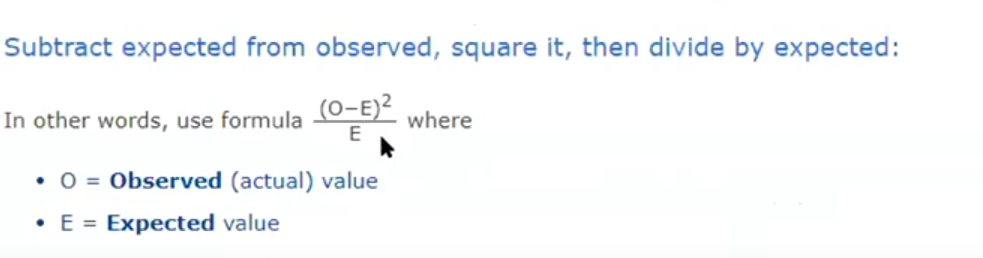

In [146]:
display(Image(filename='expected.png'))

In [148]:
chi_square=sum([(o-e)**2/e for o,e in zip(table,expected)])

In [162]:
chi_square =sum(chi_square)

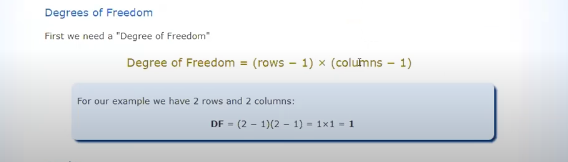

In [164]:
display(Image(filename='degree.png'))

In [166]:
dof=(2-1)*(2-1)

In [182]:
from scipy.stats import chi2

In [184]:
p_value=chi2.sf(chi_square,df=dof)